<a href="https://colab.research.google.com/github/SungaHwang/EDA/blob/master/NetflixData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nexflix Data: Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [3]:
!ls

netflix_titles.csv  sample_data


In [4]:
import io
netflix_overall = pd.read_csv(io.StringIO(uploaded['netflix_titles.csv'].decode('utf-8')))
print(netflix_overall)

     show_id  ...                                        description
0         s1  ...  In a future where the elite inhabit an island ...
1         s2  ...  After a devastating earthquake hits Mexico Cit...
2         s3  ...  When an army recruit is found dead, his fellow...
3         s4  ...  In a postapocalyptic world, rag-doll robots hi...
4         s5  ...  A brilliant group of students become card-coun...
...      ...  ...                                                ...
7782   s7783  ...  When Lebanon's Civil War deprives Zozo of his ...
7783   s7784  ...  A scrappy but poor boy worms his way into a ty...
7784   s7785  ...  In this documentary, South African rapper Nast...
7785   s7786  ...  Dessert wizard Adriano Zumbo looks for the nex...
7786   s7787  ...  This documentary delves into the mystique behi...

[7787 rows x 12 columns]


In [5]:
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


* checking for null values

In [6]:
netflix_overall.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* heatmap: 데이터들의 배열을 색상으로 표현해주는 그래프

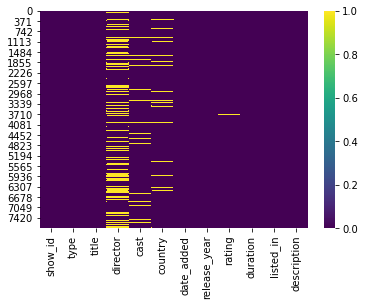

In [7]:
sns.heatmap(netflix_overall.isnull(), cmap='viridis')

director, cast, country, rating에 null values가 존재

In [8]:
netflix_overall['rating'].value_counts().unique()

array([2863, 1931,  806,  665,  386,  280,  271,  247,  194,   84,   39,
          6,    5,    3])

In [9]:
netflix_overall.drop(['director', 'cast'], axis=1, inplace=True)

In [10]:
netflix_overall.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...



Netflix가 미국에서 생성되고 모두 Netflix US에서 방영되므로 국가 열의 모든 Nan 값을 United States로 대체 (전체 열을 삭제하는 대신 데이터를 저장하기 위해 열의 값을 교체)

In [11]:
netflix_overall['country'].replace(np.nan, 'United States', inplace=True)

이미 각 영화에 대해 연도를 공개했기 때문에 공개 날짜가 없어도 분석에 큰 영향을 미치지 않는다. -> 출시 날짜 열을 삭제

In [12]:
netflix_overall.drop(['date_added'], axis=1, inplace=True)

In [13]:
netflix_overall.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
netflix_overall['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [15]:
netflix_overall['listed_in'].value_counts()

Documentaries                                        334
Stand-Up Comedy                                      321
Dramas, International Movies                         320
Comedies, Dramas, International Movies               243
Dramas, Independent Movies, International Movies     215
                                                    ... 
Action & Adventure, Dramas, Sports Movies              1
Kids' TV, Reality TV, Science & Nature TV              1
Crime TV Shows, TV Comedies, Teen TV Shows             1
Action & Adventure, Anime Features, Horror Movies      1
Dramas, Horror Movies, Sci-Fi & Fantasy                1
Name: listed_in, Length: 492, dtype: int64

rating열에 누락 된 값을 가장 일반적인  TV-MA로 대체한다.

In [16]:
netflix_overall['rating'].replace(np.nan, 'TV-MA', inplace = True)

In [17]:
netflix_overall.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
netflix_overall.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


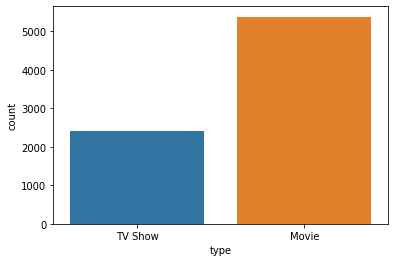

In [19]:
sns.countplot(x='type', data = netflix_overall)

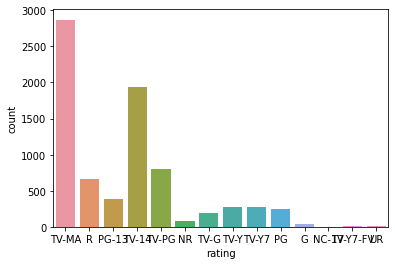

In [20]:
sns.countplot(x='rating', data= netflix_overall)

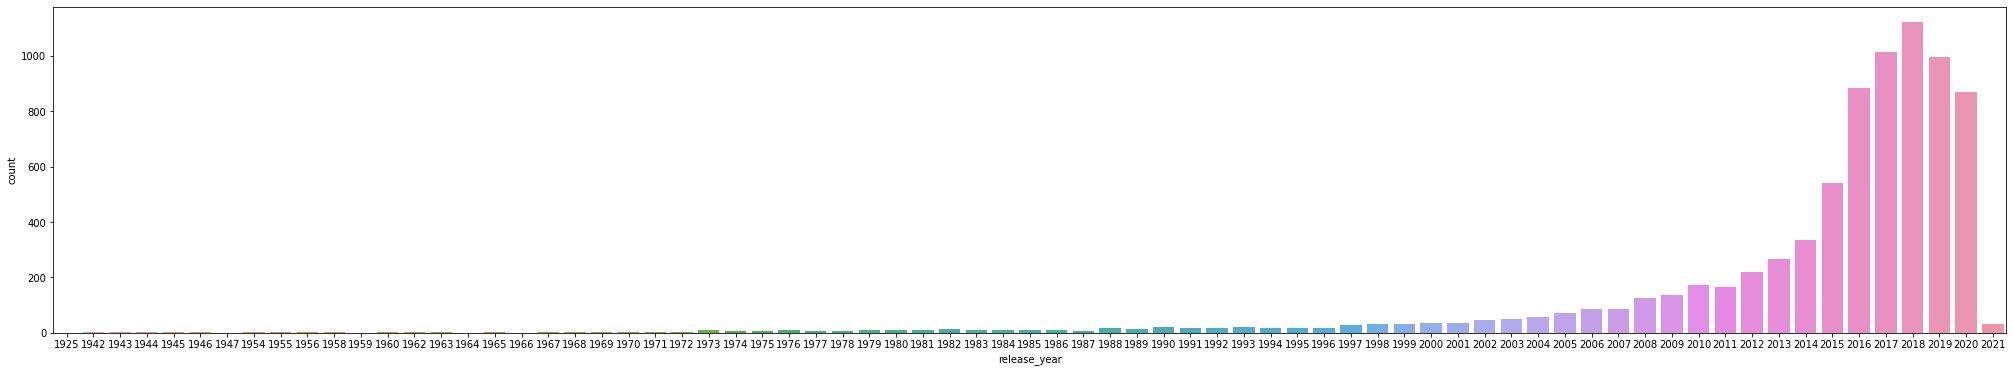

In [21]:
plt.figure(figsize=(35,6))
sns.countplot(x='release_year', data= netflix_overall)

Netflix의 대부분의 영화 및 TV 프로그램은 지난 10 년 동안 출시되었으며 이전에는 거의 출시되지 않았다.

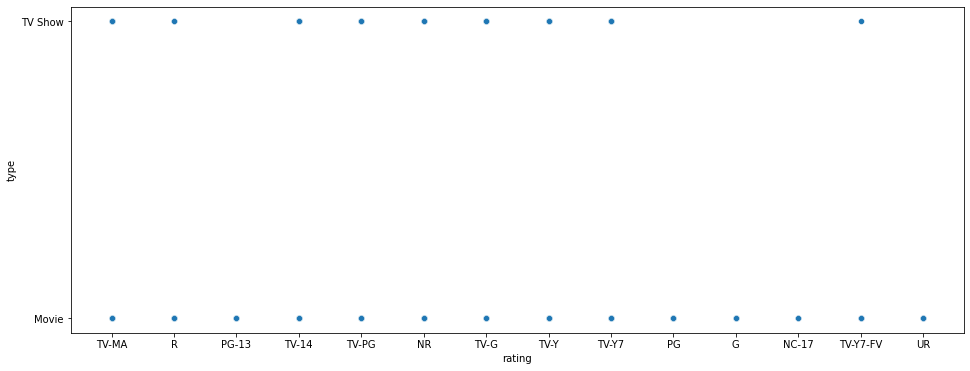

In [22]:
plt.figure(figsize= (16,6))
sns.scatterplot(x='rating', y='type', data=netflix_overall)

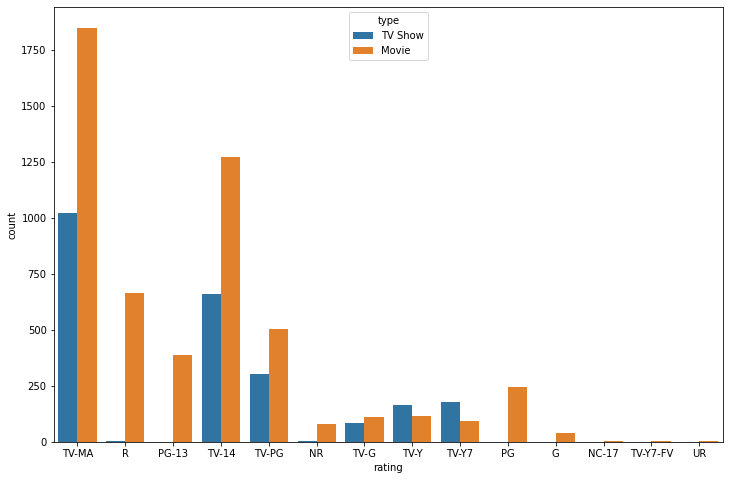

In [23]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = netflix_overall,hue='type')

In [24]:
import plotly.express as px
top_rated=netflix_overall[0:10]
fig =px.sunburst(
    top_rated,
    path=['country'])
fig.show()

TypeError: ignored

(왜 안되는지 모르겠음 ㅠㅠ)

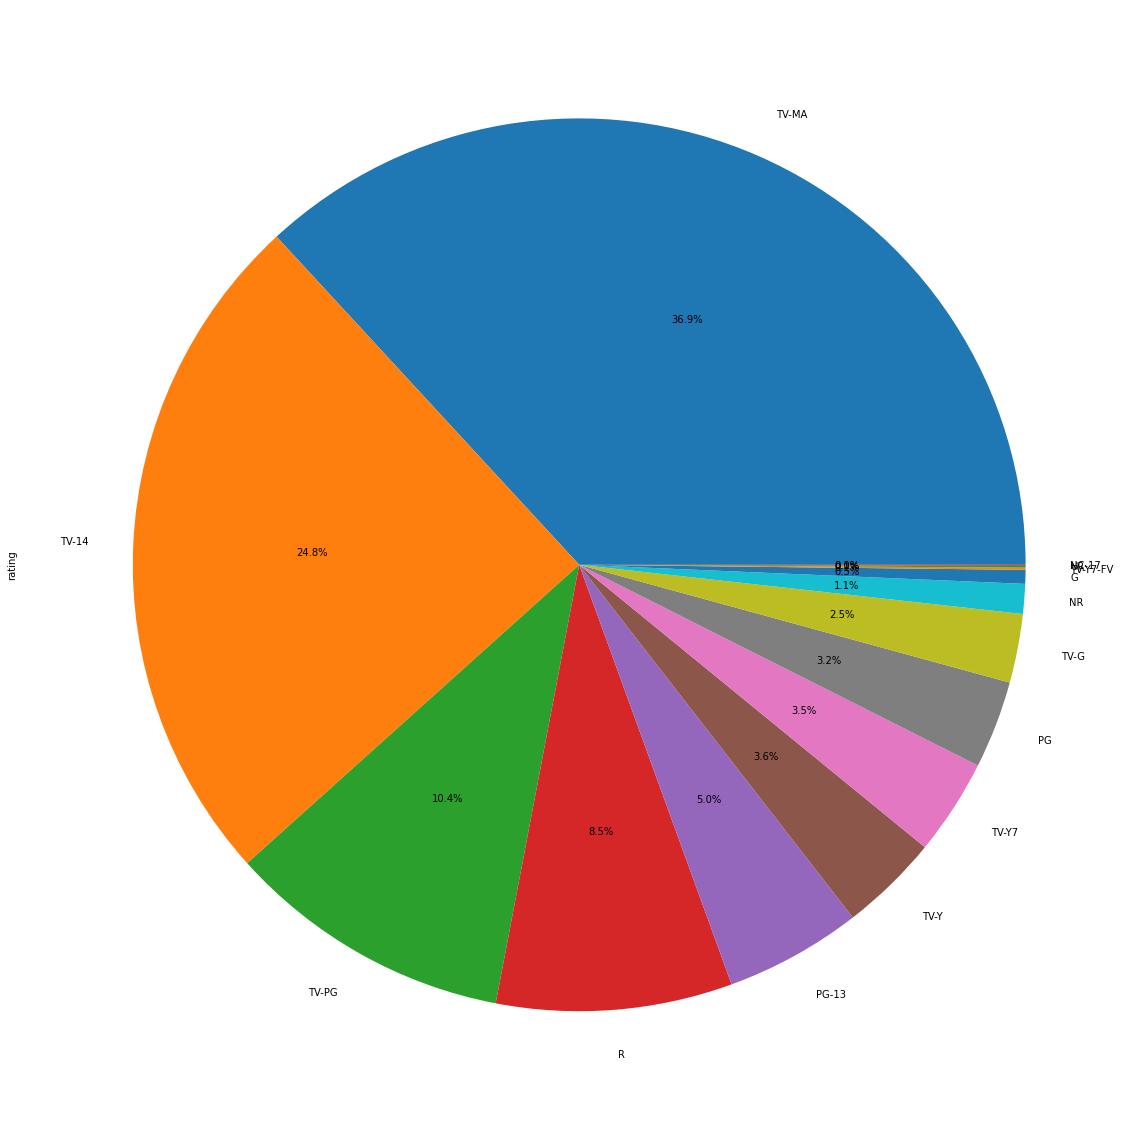

In [25]:
netflix_overall['rating'].value_counts().plot.pie(autopct = '%0.1f%%', figsize=(20,35))
plt.show()

In [26]:
country_counter = netflix_overall['country'].value_counts().sort_values(ascending= False)
country_counter = pd.DataFrame(country_count)
topcountry = country_count[0:11]
topcountry

NameError: ignored

In [27]:
old = netflix_overall.sort_values("release_year", ascending=True)
old = old[old['duration'] !=""]
old[['title', "release_year"]][:15]

,title,release_year
4867,Pioneers: First Women Filmmakers*,1925
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943
7616,Why We Fight: The Battle of Russia,1943
7268,Tunisian Victory,1944
6699,The Negro Soldier,1944
6657,The Memphis Belle: A Story of a\nFlying Fortress,1944
5371,San Pietro,1945


In [28]:
tag = "Stand-Up Comedy"
netflix_overall['relevant'] = netflix_overall['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = netflix_overall[netflix_overall["relevant"]==1]
com[com["country"] == "United States"][["title", "country", "release_year"]].head(10)

,title,country,release_year
197,A Little Help with Carol Burnett,United States,2018
305,Adam Devine: Best Time of Our Lives,United States,2019
307,ADAM SANDLER 100% FRESH,United States,2018
310,Adel Karam: Live from Beirut,United States,2018
386,Ali Wong: Baby Cobra,United States,2016
387,Ali Wong: Hard Knock Wife,United States,2018
482,Amy Schumer Growing,United States,2019
483,Amy Schumer: The Leather Special,United States,2017
535,Anjelah Johnson: Not Fancy,United States,2015
550,Anthony Jeselnik: Fire in the Maternity Ward,United States,2019


In [29]:
tag = "Kids' TV"
netflix_overall['relevant'] = netflix_overall['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = netflix_overall[netflix_overall["relevant"]==1]
com[com["country"] == "United States"][["title", "country", "release_year"]].head(10)

,title,country,release_year
108,3Below: Tales of Arcadia,United States,2019
225,A Series of Unfortunate Events,United States,2019
380,Alexa & Katie,United States,2020
396,Alien TV,United States,2020
411,All Hail King Julien,United States,2017
412,All Hail King Julien: Exiled,United States,2017
570,Archibald's Next Big Thing,United States,2020
598,Ask the StoryBots,United States,2019
632,Avatar: The Last Airbender,United States,2007
704,Bakugan: Armored Alliance,United States,2020


In [ ]:
netflix_overall_countries = pd.DataFrame(netflix_overall.country.value_counts().reset_index().values,
                                         columns = ["country", "count"])
netflix_overall_countries.head()

In [31]:
fig = px.choropleth(
    locationmode = 'country names',
    locations = netflix_overall_countries.country,
    labels = netflix_overall_countries["count"]
)
fig.show()

In [32]:
data = pd.DataFrame(netflix_overall.release_year.value_counts().reset_index().values,
                    columns=["Year", "Count"])
data.head()

,Year,Count
0,2018,1121
1,2017,1012
2,2019,996
3,2016,882
4,2020,868


Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

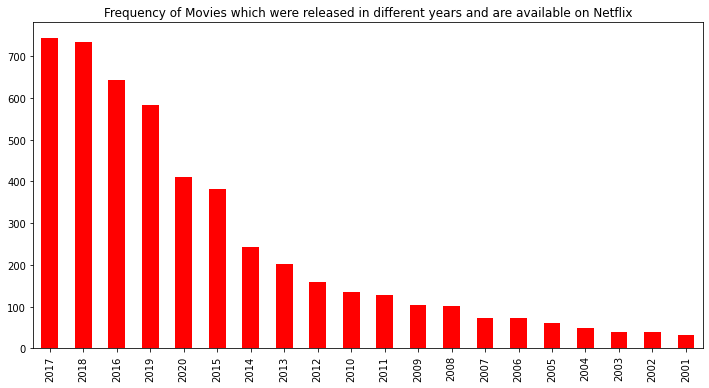

In [35]:
plt.figure(figsize=(12,6))
netflix_overall[netflix_overall["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

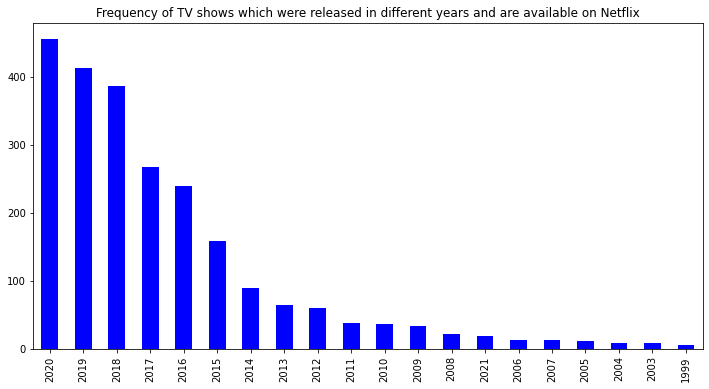

In [34]:
plt.figure(figsize=(12,6))
netflix_overall[netflix_overall["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="Blue")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

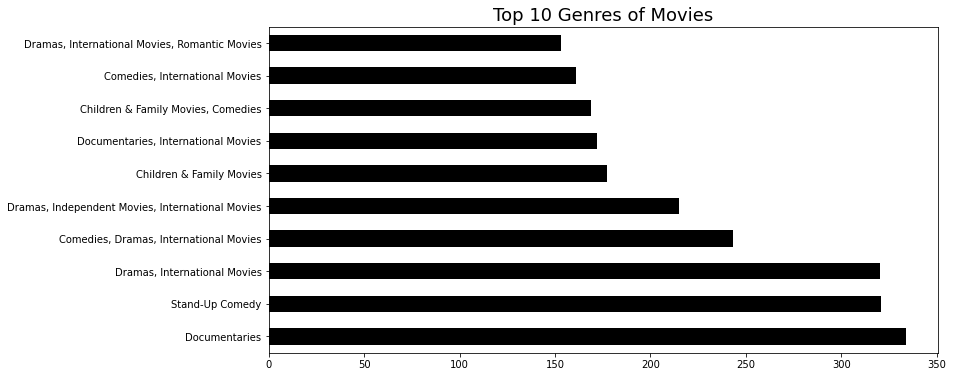

In [37]:
plt.figure(figsize=(12,6))
netflix_overall[netflix_overall["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

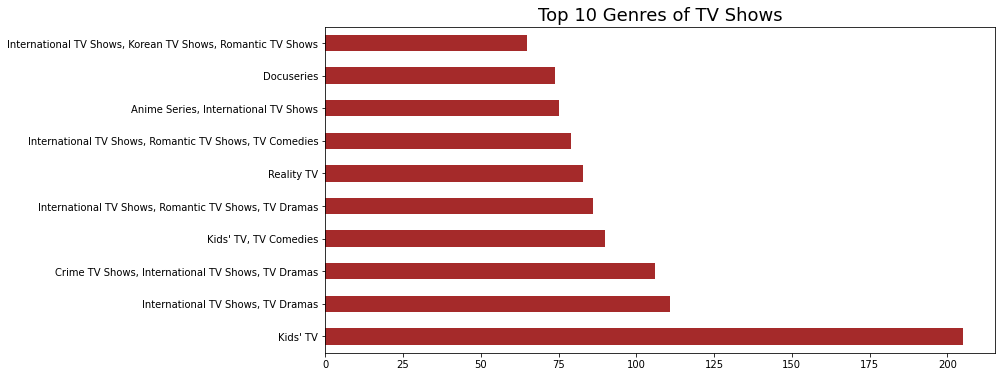

In [38]:
plt.figure(figsize=(12,6))
netflix_overall[netflix_overall["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

In [39]:
from wordcloud import WordCloud

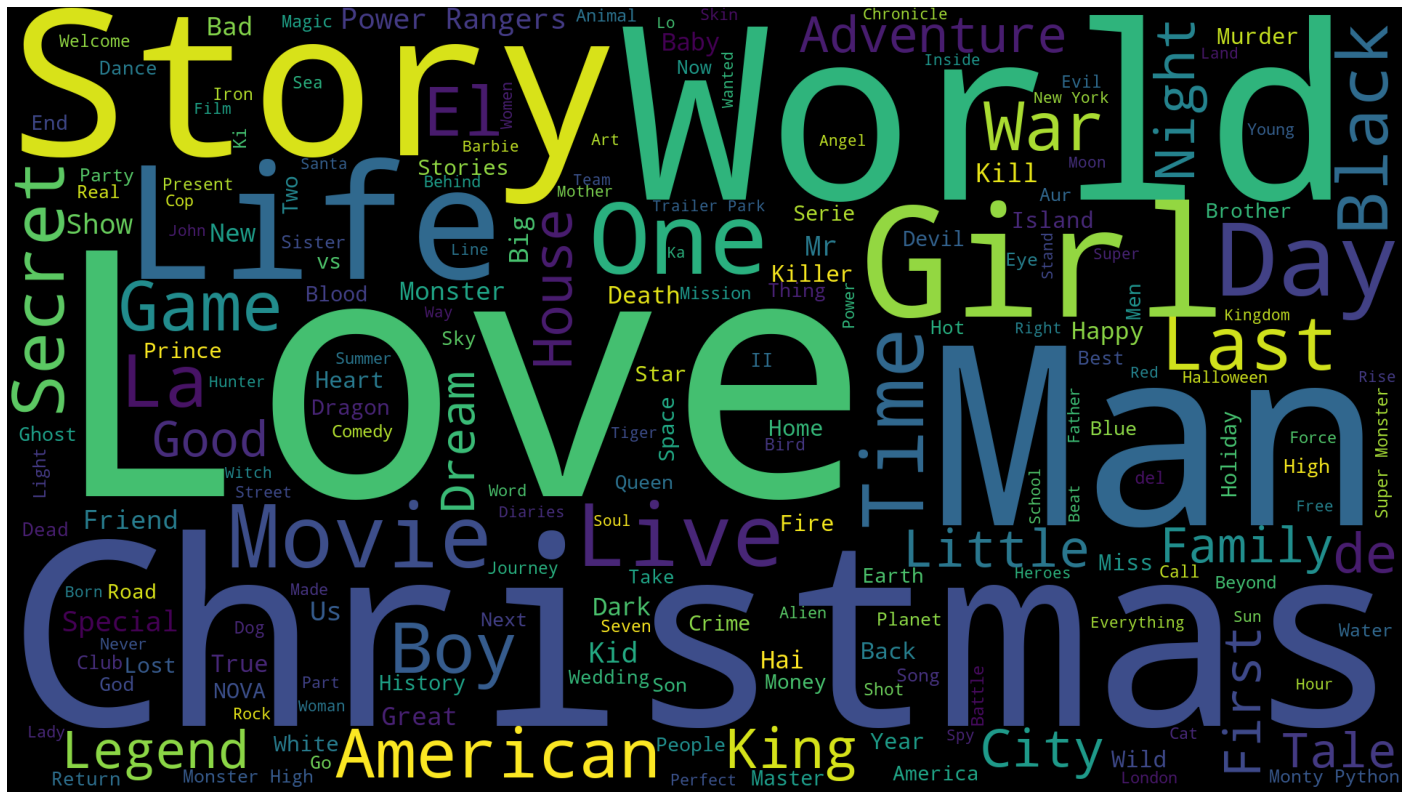

In [40]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color = 'Black',
                      width = 1920,
                      height = 1080
).generate(" ".join(netflix_overall.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()